## BLACK FRIDAY SALES DATA ANALYSIS
This workbook demonstrates the application of pandas in data analysis while analysing the **BLACK FRIDAY SALES DATA**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="https://raw.githubusercontent.com/GeeksforgeeksDS/Data-Analysis-with-Python-GFG/refs/heads/main/20.%20Black%20Friday%20-%20Walkthrough/BlackFriday.csv"
blackfriday_df=pd.read_csv(url)

Let's check the first few entries of the dataframe.

In [4]:
blackfriday_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Let's also check the size of the data.

In [5]:
blackfriday_df.shape

(537577, 12)

Now we check on the datatypes of every column

In [6]:
blackfriday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


#### CHECK FOR NULL VALUES AND IMPUTING

In [7]:
blackfriday_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

From above we observe that a significant number of values under **Product_Category_2** & **Product_Category_3** are NULL/NA and hence must be imputed.

In [8]:
from sklearn.impute import SimpleImputer

Here we resolve the issue of missing values by replacing them with **mean** values in each column.

In [9]:
mean_imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [10]:
mean_imputer.fit(blackfriday_df.iloc[:,9:11].values)

SimpleImputer(strategy='most_frequent')

Find the mean values in every category & replace them in places where NA/NULL values exists in respective columns.

In [11]:
x = mean_imputer.transform(blackfriday_df.iloc[:,9:11].values)

Put values obtained back into the dataframe

In [12]:
blackfriday_df.iloc[:,9:11] = x

Checking if NA/NULL values still exists in the 2 columns.

In [13]:
blackfriday_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

#### DISPLAY SUMMARY STATISTICS OF DATA

In [14]:
blackfriday_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.269924,14.982337,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.309034,2.747993,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,16.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8.000000,16.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [15]:

print(f"The dataset contains {len(list(blackfriday_df['User_ID'].unique()))} different users")

The dataset contains 5891 different users


### FIND USER-WISE TOTAL COST OF PRODUCTS PURCHASED
This can be achieved either using **Groupby** or iterating through every user and summing up the cost of products purchased before finally storing the result in a dictionary.

In [16]:
blackfriday_customerwise_purchase = blackfriday_df.groupby(by=['User_ID'])['Purchase'].sum().sort_values(ascending=False)

In [17]:
user_ids = list(blackfriday_customerwise_purchase.index)
total_purchases = list(blackfriday_customerwise_purchase)

In [18]:
blackfriday_customerIDs_basis_purchasedprice_df = pd.DataFrame(data=user_ids,columns=['USER ID'])

In [19]:
blackfriday_customerIDs_basis_purchasedprice_df.head()

,USER ID
0,1004277
1,1001680
2,1002909
3,1001941
4,1000424


In [20]:
blackfriday_purchasedvalues_df = pd.DataFrame(data=total_purchases,columns=['PURCHASED VALUE'])
blackfriday_purchasedvalues_df.head()

,PURCHASED VALUE
0,10536783
1,8699232
2,7577505
3,6817493
4,6573609


Here we create a dataframe that contains CustomerIDs and corresponding Total Value of Products Purchased listed in descending order of purchased value.

In [21]:
assert len(blackfriday_customerIDs_basis_purchasedprice_df)==len(blackfriday_purchasedvalues_df),"Do not match"

In [22]:
blackfriday_customerID_and_TotalWorthOfItemsPurchased_df = pd.concat([blackfriday_customerIDs_basis_purchasedprice_df,blackfriday_purchasedvalues_df],axis=1)

Let us take a look at how the dataframe looks like.

In [23]:
blackfriday_customerID_and_TotalWorthOfItemsPurchased_df.head()

,USER ID,PURCHASED VALUE
0,1004277,10536783
1,1001680,8699232
2,1002909,7577505
3,1001941,6817493
4,1000424,6573609


In [24]:
blackfriday_customerID_and_TotalWorthOfItemsPurchased_df.tail()

,USER ID,PURCHASED VALUE
5886,1004464,46091
5887,1005944,46070
5888,1005012,45551
5889,1005117,44432
5890,1004991,44108


### OUTLIER DETECTION
Presence of outliers significantly impacts the final analysis and hence must be either removed/replaced with suitable values. This is essential for proper understanding the data
and finding out relationships/patterns present between pairs of variables.

Here we use box-whisker plots to figure out outliers if any. If the frequencies of such outliers turn out to be large we replace them with either mean/median/mode and if not we omit them.

<Axes: xlabel='PURCHASED VALUE'>

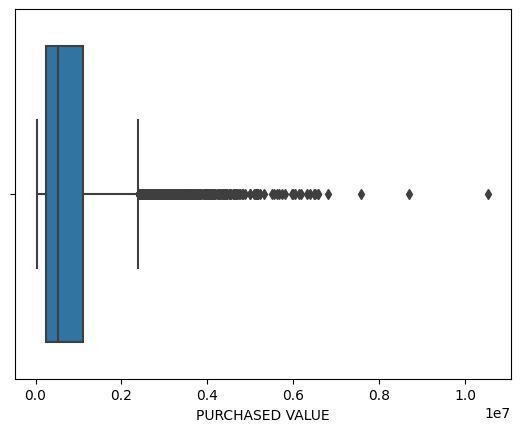

In [25]:
sns.boxplot(data=blackfriday_customerID_and_TotalWorthOfItemsPurchased_df,x=blackfriday_customerID_and_TotalWorthOfItemsPurchased_df['PURCHASED VALUE'])

### FIND OUTLIERS BASIS TOTAL WORTH OF ITEMS PURCHASED AND ANALYSE WHICH CLASS OF GENDER DO MAJORITY OF SUCH CUSTOMERS COME UNDER
As can be observed from the above box-whisker plot there exists numerous customers having purchased products worth a significant price. Let us try to find out the gender and age group of the majority of such customers.

In [26]:
# find Q1, Q2 & Q3
Q2 = blackfriday_customerID_and_TotalWorthOfItemsPurchased_df['PURCHASED VALUE'].median()
pts_belowQ2 = list(filter(lambda x:x<Q2,blackfriday_customerID_and_TotalWorthOfItemsPurchased_df['PURCHASED VALUE']))
pts_aboveQ2 = list(filter(lambda x:x>Q2,blackfriday_customerID_and_TotalWorthOfItemsPurchased_df['PURCHASED VALUE']))

In [27]:
Q1 = pd.Series(pts_belowQ2).median()
Q3 = pd.Series(pts_aboveQ2).median()

In [28]:
IQR=Q3-Q1
Upper_limit = Q3+1.5*IQR

In [29]:
#find outliers w.r.t total worth of purchased items
outliers_basis_totalpurchases=list(filter(lambda x:x>Upper_limit,total_purchases))

In [30]:
Upper_limit

2396206.5

In [31]:
min(outliers_basis_totalpurchases),max(outliers_basis_totalpurchases)

(2399110, 10536783)

In [32]:
print(f"There exists {len(outliers_basis_totalpurchases)} customers who purchased products beyond what the top 25% of the population spent which accounts for {(len(outliers_basis_totalpurchases)/blackfriday_df['User_ID'].nunique())*100:.2f}% of the entire customer base")

There exists 424 customers who purchased products beyond what the top 25% of the population spent which accounts for 7.20% of the entire customer base


### FIND DISTRIBUTION OF GENDERS AND AGE AMONG THE POPULATION THAT ARE OUTLIERS
Here we figure out which among MALE/FEMALE and in which age group does the majority among the outliers fall.

To find genders and age groups the outlier customers come under we first find their IDs and then figure out gender & age-groups.

In [33]:
def Find_IDs_Of_Outliers():
    ans = []
    for i in range(len(blackfriday_customerID_and_TotalWorthOfItemsPurchased_df)):
        if blackfriday_customerID_and_TotalWorthOfItemsPurchased_df.iloc[i]['PURCHASED VALUE'] in outliers_basis_totalpurchases:
            ans.append(blackfriday_customerID_and_TotalWorthOfItemsPurchased_df.iloc[i]['USER ID'])
    return ans

In [34]:
IDs_Of_outliers = Find_IDs_Of_Outliers()

In [35]:
## create a dataframe with groupby that includes UserID and Gender
blackfriday_customerID_Gender_and_Age = blackfriday_df.groupby(by=['User_ID','Gender','Age'])['Purchase'].sum().sort_values(ascending=False)

In [36]:
blackfriday_customerID_Gender_and_Age.head()

User_ID  Gender  Age  
1004277  M       36-45    10536783
1001680  M       26-35     8699232
1002909  M       26-35     7577505
1001941  M       36-45     6817493
1000424  M       26-35     6573609
Name: Purchase, dtype: int64

In [37]:
def Obtain_Gender_And_Age_Distribution_Of_Outliers():
    gender_dict={}
    age_dict={}

    for indx, values in blackfriday_customerID_Gender_and_Age.items():
        id,gender,age = indx
        if id in IDs_Of_outliers:
            if gender not in gender_dict:
                gender_dict[gender]=0
            if age not in age_dict:
                age_dict[age]=0
            gender_dict[gender]+=1
            age_dict[age]+=1
    return gender_dict,age_dict

In [38]:
Genders_in_outliers,Ages_in_outliers = Obtain_Gender_And_Age_Distribution_Of_Outliers()

In [39]:
Genders_in_outliers,Ages_in_outliers

({'M': 341, 'F': 83},
 {'36-45': 85,
  '26-35': 191,
  '18-25': 74,
  '46-50': 34,
  '55+': 6,
  '0-17': 5,
  '51-55': 29})

### DISPLAY GENDER DISTRIBUTION 

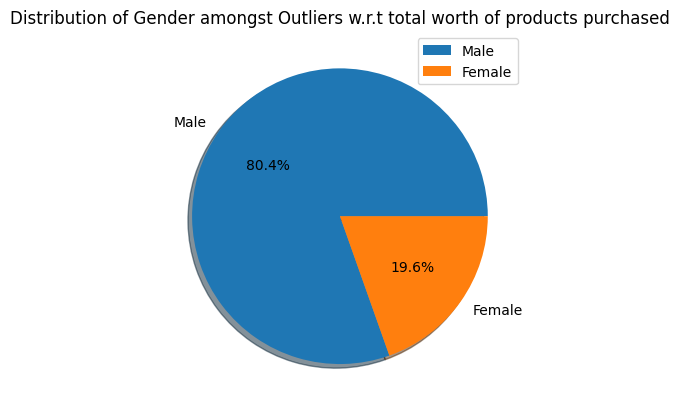

In [40]:
plt.pie(list(Genders_in_outliers.values()),labels=['Male','Female'],autopct="%.1f%%",shadow=True)
plt.legend()
plt.title("Distribution of Gender amongst Outliers w.r.t total worth of products purchased")
plt.show()

### DISPLAY AGEWISE DISTRIBUTION AMONGST OUTLIERS

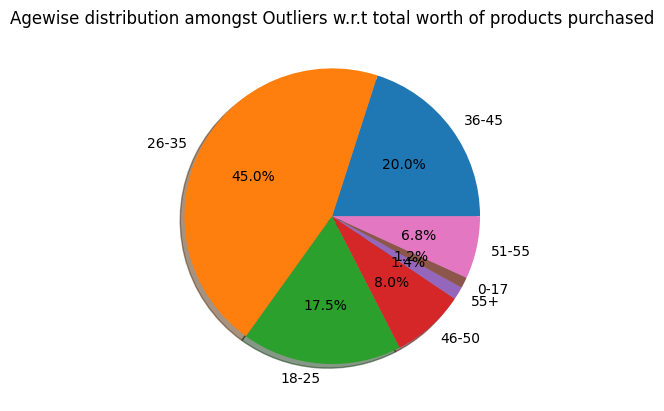

In [41]:
plt.pie(list(Ages_in_outliers.values()),labels=list(Ages_in_outliers.keys()),autopct="%.1f%%",shadow=True)
plt.title("Agewise distribution amongst Outliers w.r.t total worth of products purchased")
plt.show()

### VISUALIZE THE DISTRIBUTION OF GENDER ACROSS ALL CUSTOMERS
Here we display the distribution of male & female classes across the entire customer base.

<Axes: xlabel='Gender', ylabel='count'>

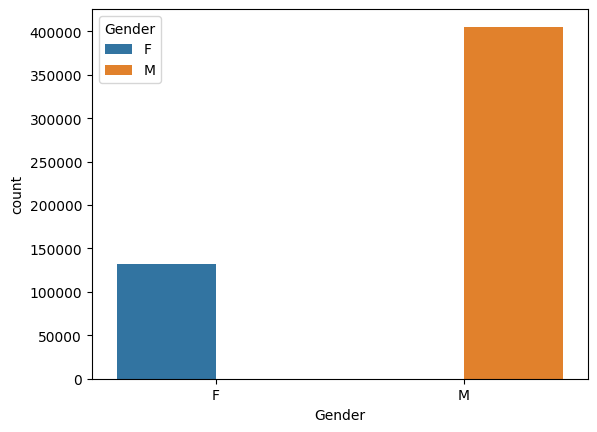

In [42]:
sns.countplot(data=blackfriday_df,x="Gender",hue="Gender")
# plt.legend(list(blackfriday_df['Gender'].unique()))

#### DISPLAY GENDER DISTRIBUTION ACROSS DIFFERENT AGE-GROUPS
Here we visualize distribution of gender across varying age-groups among the customers.
We make use of seaborn's **COUNTPLOT** function. **HUE** - a parameter of the function is used for nested grouping. Since we look into how different genders for every age-groups
are distributed amongst the customers we pass on "GENDER" as a value to it.

<Axes: xlabel='Age', ylabel='count'>

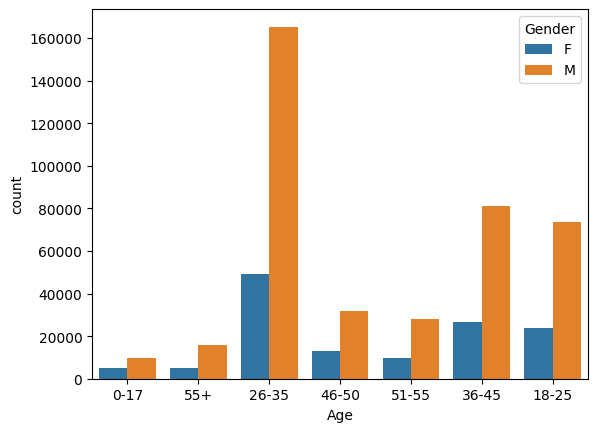

In [43]:
sns.countplot(data=blackfriday_df,x='Age',hue='Gender')

From above we observe that predominantly for both sets of gender the majority of the customers fall within the age group of 26-35 yrs with clearly more male customers than female.

#### DISPLAY DISTRIBUTION OF CUSTOMERS BASIS MARITAL STATUS
Here we observe how many of each class of customers distinguished by their marital status purchased items.

<Axes: xlabel='Marital_Status', ylabel='count'>

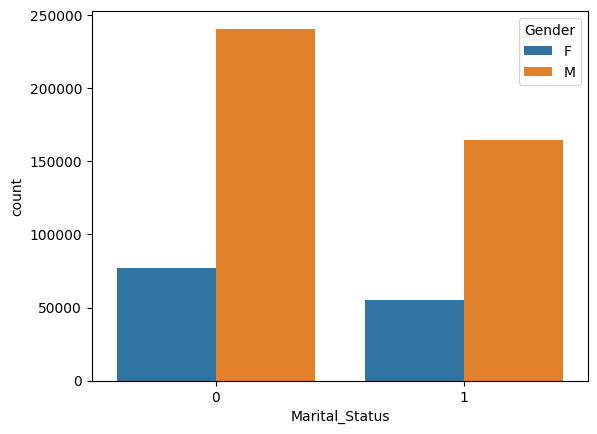

In [44]:
sns.countplot(data=blackfriday_df,x='Marital_Status',hue='Gender')

As can be observed above most of the customers who purchased items during the sale are unmarried of which majority are male.

#### DISPLAY CITY DISTRIBUTION
Here we display cities basis the number of purchases made by customers from each of them.

<Axes: xlabel='City_Category', ylabel='count'>

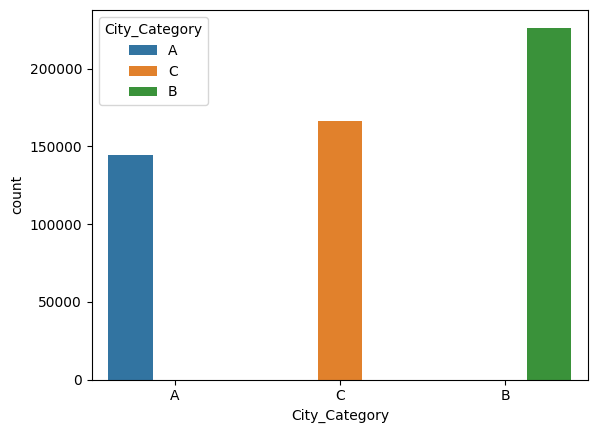

In [45]:
sns.countplot(data=blackfriday_df,x='City_Category',hue='City_Category')

#### DISPLAY AGEWISE DISTRIBUTION OF CUSTOMERS ACROSS DIFFERENT CITIES BASIS NUMBER OF PURCHASES

<Axes: xlabel='City_Category', ylabel='count'>

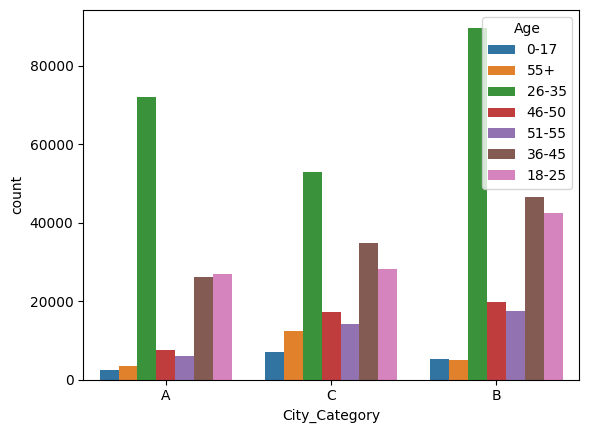

In [46]:
sns.countplot(data=blackfriday_df,x='City_Category',hue='Age')

#### DISPLAY DISTRIBUTION OF CITIES BASIS THE TOTAL WORTH OF ITEMS PURCHASED AND AVG PRICE OF ITEMS DURING SALE

<Axes: ylabel='Purchase'>

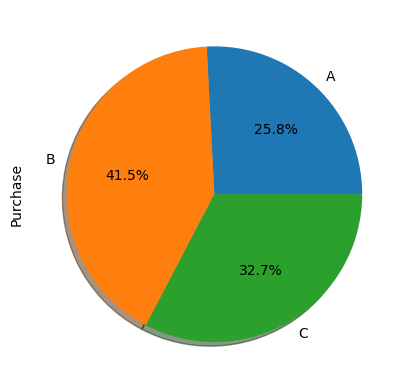

In [47]:
blackfriday_df.groupby(by=['City_Category'])['Purchase'].sum().plot(kind='pie',autopct='%0.1f%%', shadow=True)

<Axes: ylabel='Purchase'>

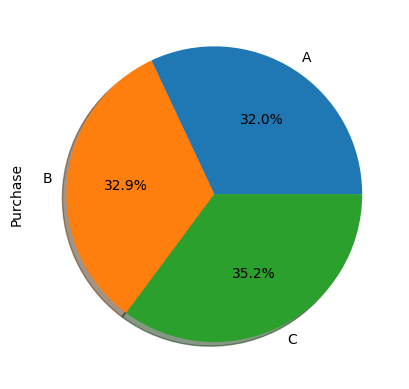

In [48]:
blackfriday_df.groupby(by=['City_Category'])['Purchase'].mean().plot(kind='pie',autopct="%0.1f%%",shadow=True)

From above 2 pie-plots we see that in terms of total worth of items purchased during sale city B stands out whereas basis the avg amount spent on purchase of a single
item city C outshines the rest.
Also even though city A buys less number of products since their avg spend on a single item is same as that of B it implies they tend to buy expensive items more.

#### DISPLAY DISTRIBUTION OF CUSTOMERS BASIS THE NUMBER OF YEARS HAVING LIVED IN THEIR CURRENT CITY
Here we display distribution of customers basis the number of years such customers resided in their current city.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

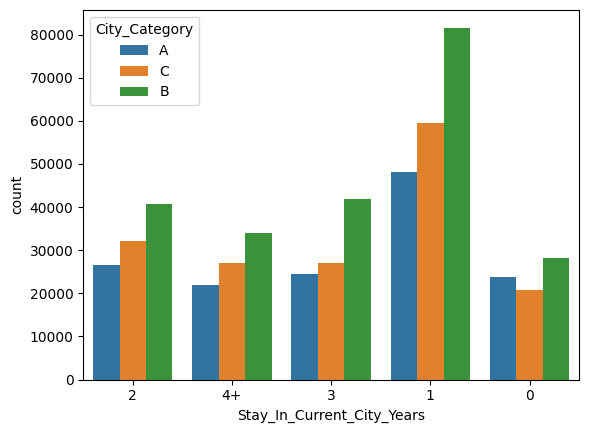

In [49]:
sns.countplot(data=blackfriday_df,x='Stay_In_Current_City_Years',hue='City_Category')

From above we see that it the customers residing in city B having lived there for 1 year who made the most number of purchases during the sale. Whereas customers who're new to cities made the least number of purchases during the sale.

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

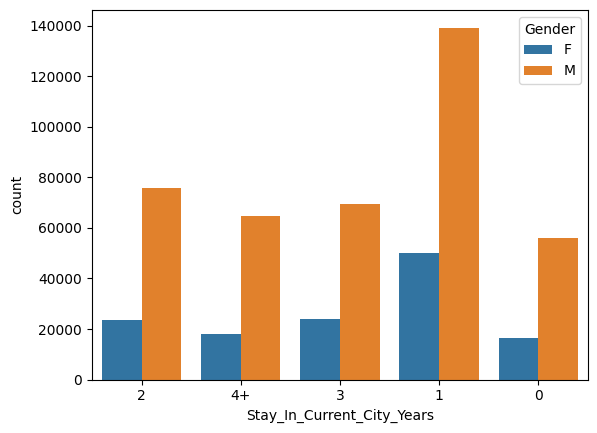

In [50]:
sns.countplot(data=blackfriday_df,x='Stay_In_Current_City_Years',hue='Gender')

#### DISPLAY DISTRIBUTION OF CUSTOMERS BASIS OCCUPATION ACROSS DIFFERENT GENDER

<Axes: xlabel='Occupation', ylabel='count'>

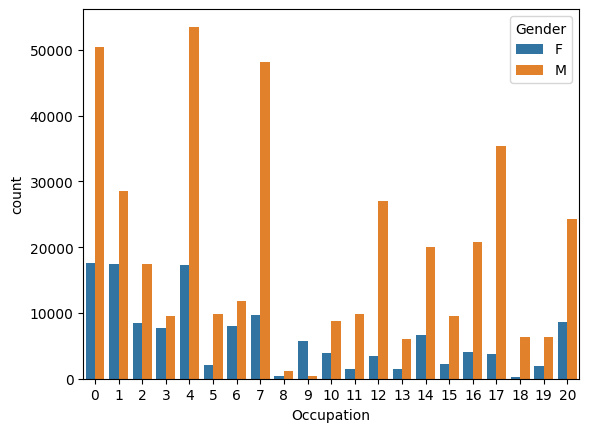

In [51]:
sns.countplot(data=blackfriday_df,x='Occupation',hue='Gender')

The above display shows that male with occupation categorised 4 has the highest purchasing power i.e. they buy the most number of products.

<Axes: xlabel='Occupation'>

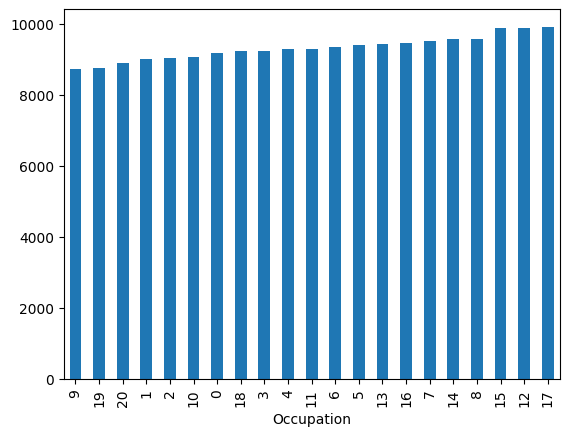

In [52]:
blackfriday_df.groupby(by=['Occupation'])['Purchase'].mean().sort_values().plot(kind='bar')

The above plot indicates that although male with job role 4 bought the most number of products during the sale customers with job role 17 have a tendency to purchase 
expensive products.

#### DISPLAY DISTRIBUTIONS OF CUSTOMERS BASIS OCCUPATION AND NUMBER OF DIFFERENT CATEGORY OF PRODUCTS PURCHASED
Here we for each different product category plot results to visualize distribution of customers across different job roles. 

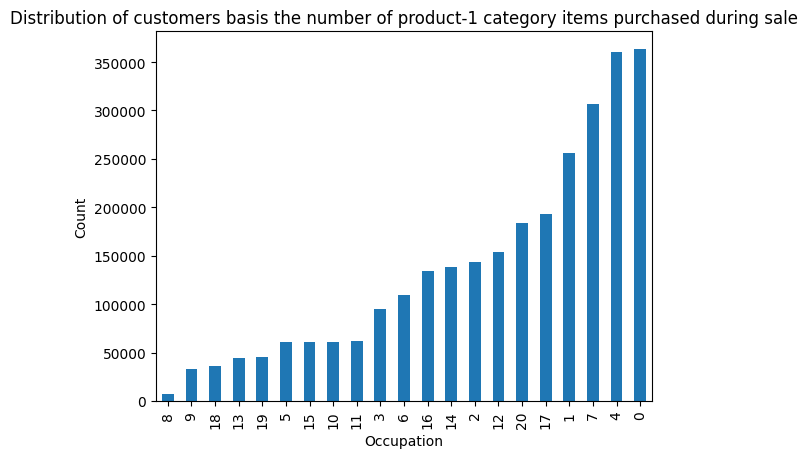

In [53]:
blackfriday_df.groupby(by=['Occupation'])['Product_Category_1'].sum().sort_values().plot(kind='bar')
plt.title('Distribution of customers basis the number of product-1 category items purchased during sale')
plt.ylabel('Count')
plt.show()

From above we observe that most of the items that belong to category-1 was purchased by those witht job roles 0 & 4 resp and least by ones with job role 8.

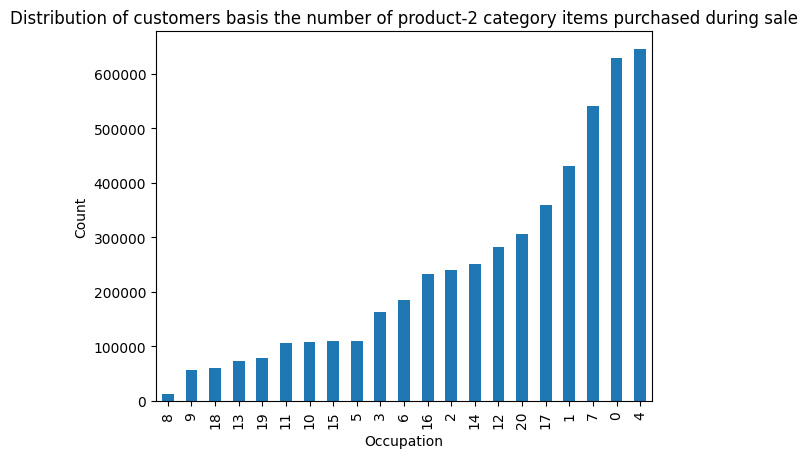

In [54]:
blackfriday_df.groupby(by=['Occupation'])['Product_Category_2'].sum().sort_values().plot(kind='bar')
plt.title('Distribution of customers basis the number of product-2 category items purchased during sale')
plt.ylabel('Count')
plt.show()

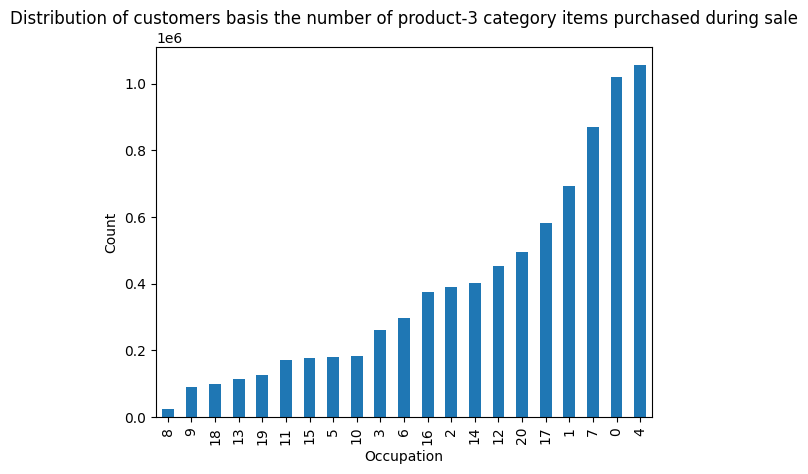

In [55]:
blackfriday_df.groupby(by=['Occupation'])['Product_Category_3'].sum().sort_values().plot(kind='bar')
plt.title('Distribution of customers basis the number of product-3 category items purchased during sale')
plt.ylabel('Count')
plt.show()

#### DISPLAY DISTRIBUTION OF CUSTOMERS BASIS OCCUPATION AND THE NUMBER OF UNIQUE ITEMS PURCHASED
Here we visualize the distribution of customers basis their occupation and the number of different unique products purchased.

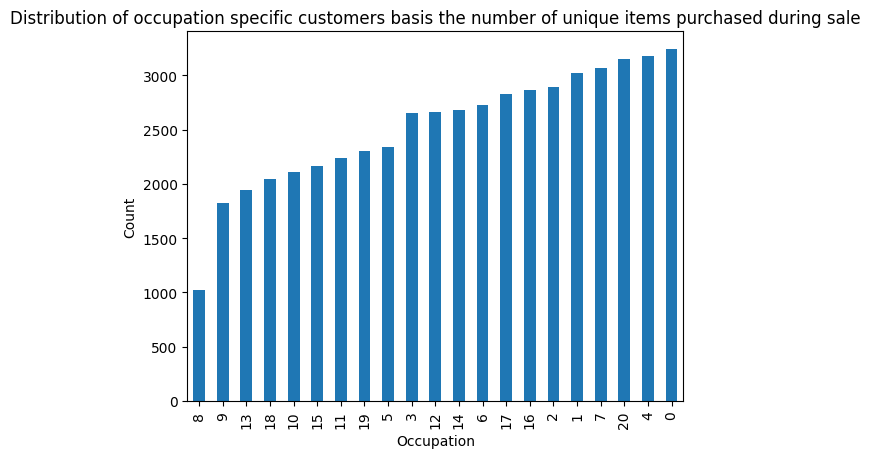

In [56]:
blackfriday_df.groupby(by=['Occupation'])['Product_ID'].nunique().sort_values().plot(kind='bar')
plt.title('Distribution of occupation specific customers basis the number of unique items purchased during sale')
plt.ylabel('Count')
plt.show()

#### VISUALIZE NUMBER OF PRODUCTS PURCHASED FOR EACH SET OF ITEMS PRESENT UNDER RESPECTIVE CATEGORIES

Let's look at what products customers tend to purchase the most and which one's the least purchased across different product categories.

Note that in **Groupby** function the **size()** function computes the frequency/total number of items for each of the index.

<Axes: xlabel='Product_Category_1'>

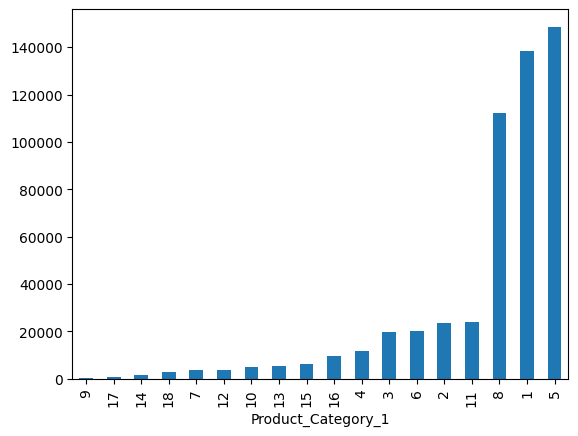

In [57]:
blackfriday_df.groupby(by=['Product_Category_1']).size().sort_values().plot(kind='bar')

From above we see that amongst **Product_Category_1** product 5 is sold the most followed by 1 & 8 resp.

<Axes: xlabel='Product_Category_2'>

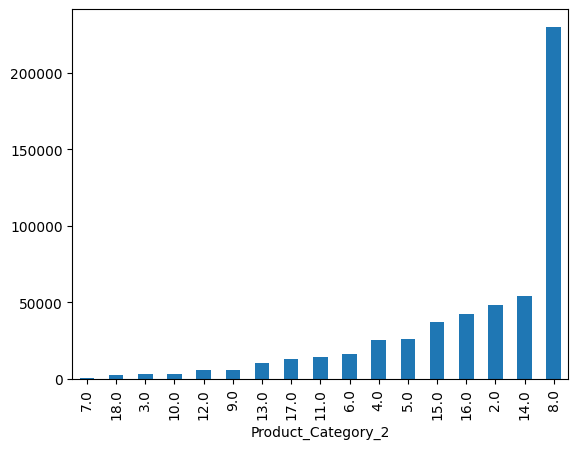

In [58]:
blackfriday_df.groupby(by=['Product_Category_2']).size().sort_values().plot(kind='bar')

From above we observe that among all items under category-2 8 is sold the most with 7 the least.

<Axes: xlabel='Product_Category_3'>

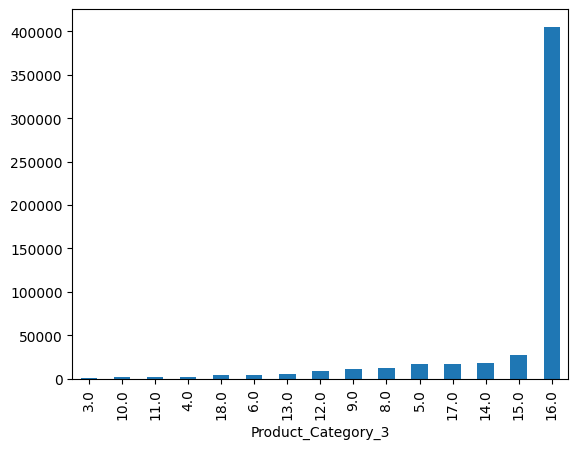

In [59]:
blackfriday_df.groupby(by=['Product_Category_3']).size().sort_values().plot(kind='bar')

From above we observe that among all items under category-3 16 is sold the most with 3 the least.

#### DISPLAY TOTAL PURCHASED ITEMS BASIS AGE GROUPS AND MARITAL STATUS

In [60]:
df_age_marital=blackfriday_df.groupby(by=['Age','Marital_Status'])['Purchase'].sum().sort_values(ascending=False)

In [61]:
df_age_marital.head()

Age    Marital_Status
26-35  0                 1215627476
       1                  784121630
18-25  0                  714568812
36-45  0                  615495474
       1                  395154091
Name: Purchase, dtype: int64